# Chapter 7 Exercises

In [1]:
import matplotlib.pyplot as plt
import pymc3 as pm
import numpy as np
from scipy import stats
import arviz as az
import pandas as pd
from scipy.special import expit as logistic


WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


## Exercise 1

In [2]:
def exp_quad_kernel(x, knots, ℓ=1):
    """exponentiated quadratic kernel"""
    return np.array([np.exp(-(x-k)**2 / (2*ℓ**2)) for k in knots])

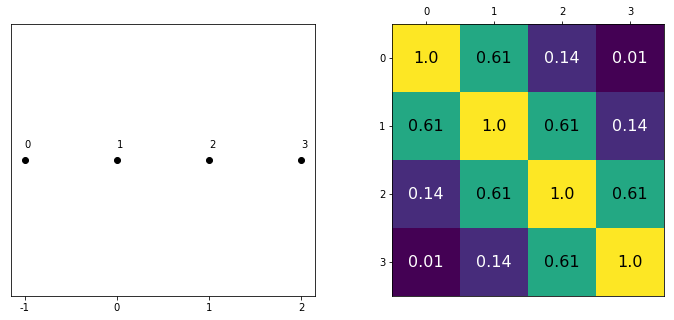

In [3]:
data = np.array([-1, 0, 1, 2])

def plot_covariance(data):
    """Functionalize the code block from the chapter to try different data"""
    cov = exp_quad_kernel(data, data, 1)

    _, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax = np.ravel(ax)

    ax[0].plot(data, np.zeros_like(data), 'ko')
    ax[0].set_yticks([])
    for idx, i in enumerate(data):
        ax[0].text(i, 0+0.005, idx)
    ax[0].set_xticks(data)
    ax[0].set_xticklabels(np.round(data, 2))
    #ax[0].set_xticklabels(np.round(data, 2), rotation=70)

    ax[1].grid(False)
    im = ax[1].imshow(cov)
    colors = ['w', 'k']
    for i in range(len(cov)):
        for j in range(len(cov)):
            ax[1].text(j, i, round(cov[i, j], 2),
                       color=colors[int(im.norm(cov[i, j]) > 0.5)],
                       ha='center', va='center', fontdict={'size': 16})
    ax[1].set_xticks(range(len(data)))
    ax[1].set_yticks(range(len(data)))
    ax[1].xaxis.tick_top()
plot_covariance(data)

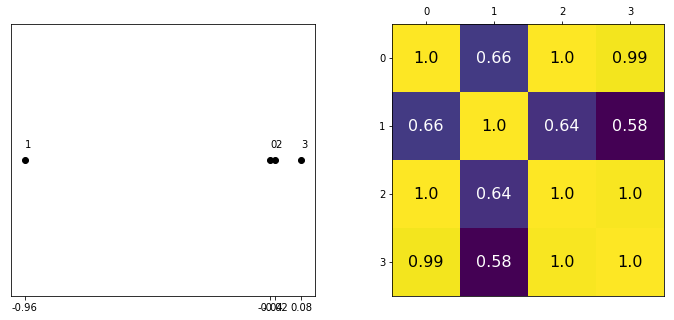

In [4]:
data = np.random.normal(size=4)
plot_covariance(data)

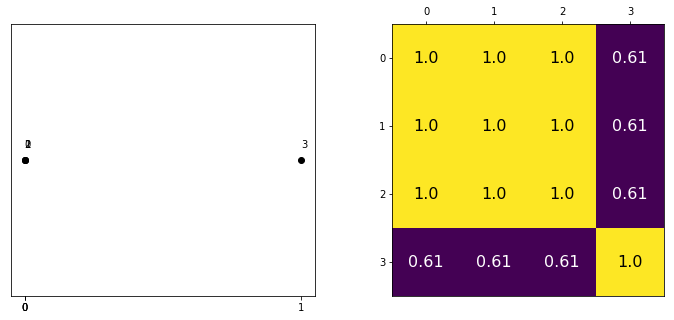

In [5]:
data = np.array([0, 0, 0,1])
plot_covariance(data)

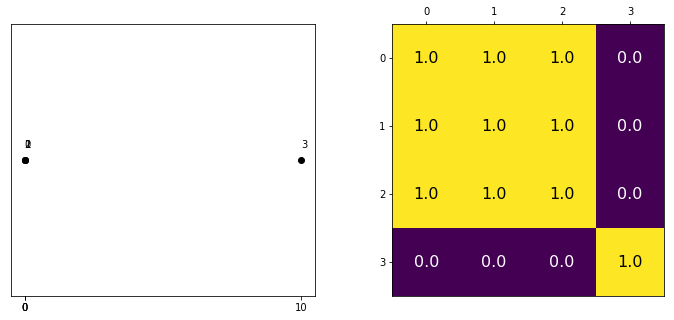

In [6]:
data = np.array([0, 0, 0,10])
plot_covariance(data)

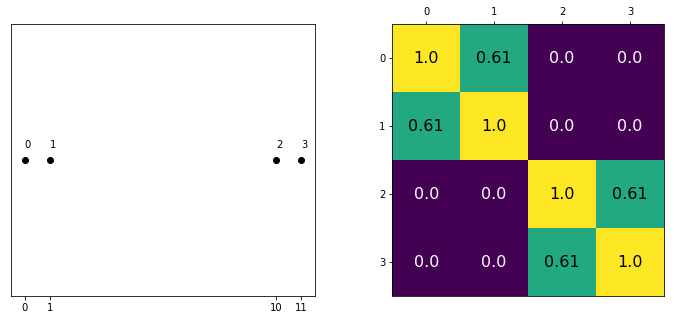

In [7]:
data = np.array([0, 1, 10,11])
plot_covariance(data)

We can validate the kernel value between the points 10 and 11 by using the calculation below. This should match the value in the image

In [8]:
np.exp(-(11-10)**2 / (2*1**2))

0.6065306597126334

## Exercise 2
Rerun the code generating Figure 7.3 and increase the number of samples obtained from the GP-prior to around 200. In the original figure the number of
samples is 2. Which is the range of the generated Y values?

### Question
When you mean generated values is that the range from the multivariate_normal? When referring to Y what is Y in this case?

Text(-0.03, 0.5, 'f(x)')

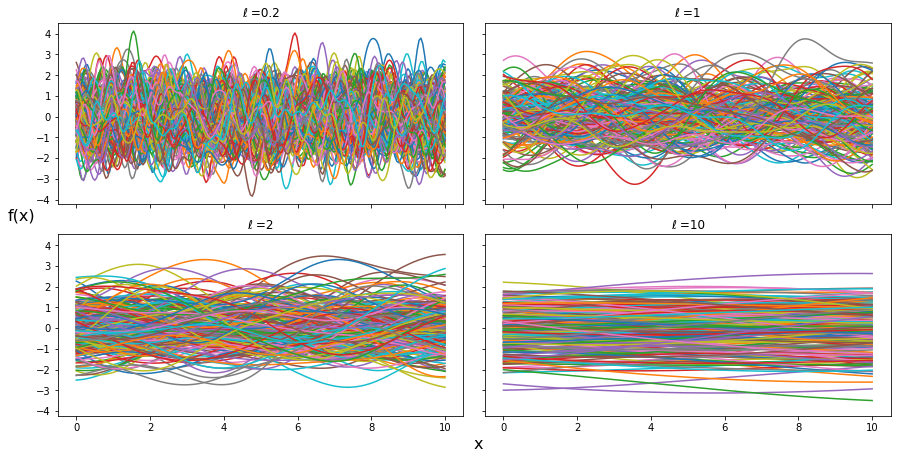

In [9]:
np.random.seed(24)
test_points = np.linspace(0, 10, 200)
fig, ax = plt.subplots(2, 2, figsize=(12, 6), sharex=True,
                       sharey=True, constrained_layout=True)
ax = np.ravel(ax)

for idx, ℓ in enumerate((0.2, 1, 2, 10)):
    cov = exp_quad_kernel(test_points, test_points, ℓ)
    ax[idx].plot(test_points, stats.multivariate_normal.rvs(cov=cov, size=200).T)
    ax[idx].set_title(f'ℓ ={ℓ}')
fig.text(0.51, -0.03, 'x', fontsize=16)
fig.text(-0.03, 0.5, 'f(x)', fontsize=16)

## Exercise 3

For the generated plot in the previous exercise. Compute the standard deviation
for the values of at each point. Do this in the following form:
* Visually, just observing the plots
* Directly from the values generated from stats.multivariate_normal.rvs
* By inspecting the covariance matrix (if you have doubts go back to exercise 1)

Did the values you get from these 3 methods agree?

## Exercise 4
Re-run the model model_reg and get new plots but using as `test_points X_new np.linspace(np.floor(x.min()), 20, 100)[:,None]` . What did you observed? How is this related to the specification of the GP-prior?

## Question:
I don't undersstand what the question is asking?

In [12]:
np.random.seed(42)
x = np.random.uniform(0, 10, size=15)
y = np.random.normal(np.sin(x), 0.1)
X = x[:, None]

with pm.Model() as model_reg:
    # hyperprior for lengthscale kernel parameter
    ℓ = pm.Gamma('ℓ', 2, 0.5)
    # instanciate a covariance function
    cov = pm.gp.cov.ExpQuad(1, ls=ℓ)
    # instanciate a GP prior
    gp = pm.gp.Marginal(cov_func=cov)
    # prior
    ϵ = pm.HalfNormal('ϵ', 25)
    # likelihood
    y_pred = gp.marginal_likelihood('y_pred', X=X, y=y, noise=ϵ)
    trace_reg = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, ℓ]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:05<00:00, 1698.87draws/s]
The acceptance probability does not match the target. It is 0.8809037732131105, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16bd9142e8>,
      dtype=object)

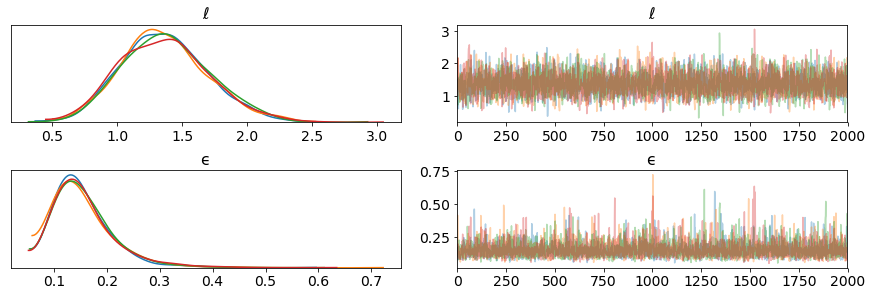

In [13]:
az.plot_trace(trace_reg)

# Exercise 5
Go back to exercise 1, but this time use a linear kernel (see the accompanying code for a linear kernel)

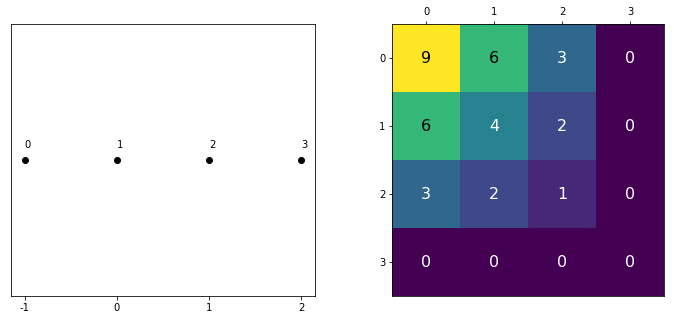

In [14]:
data = np.array([-1, 0, 1, 2])

def linear_kernel(x, knots):
    """ linear kernel """
    return np.array([(x - 2) * (k - 2) for k in knots])

def plot_covariance(data):
    """Functionalize the code block from the chapter to try different data"""
    cov = linear_kernel(data, data)

    _, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax = np.ravel(ax)

    ax[0].plot(data, np.zeros_like(data), 'ko')
    ax[0].set_yticks([])
    for idx, i in enumerate(data):
        ax[0].text(i, 0+0.005, idx)
    ax[0].set_xticks(data)
    ax[0].set_xticklabels(np.round(data, 2))
    #ax[0].set_xticklabels(np.round(data, 2), rotation=70)

    ax[1].grid(False)
    im = ax[1].imshow(cov)
    colors = ['w', 'k']
    for i in range(len(cov)):
        for j in range(len(cov)):
            ax[1].text(j, i, round(cov[i, j], 2),
                       color=colors[int(im.norm(cov[i, j]) > 0.5)],
                       ha='center', va='center', fontdict={'size': 16})
    ax[1].set_xticks(range(len(data)))
    ax[1].set_yticks(range(len(data)))
    ax[1].xaxis.tick_top()
plot_covariance(data)

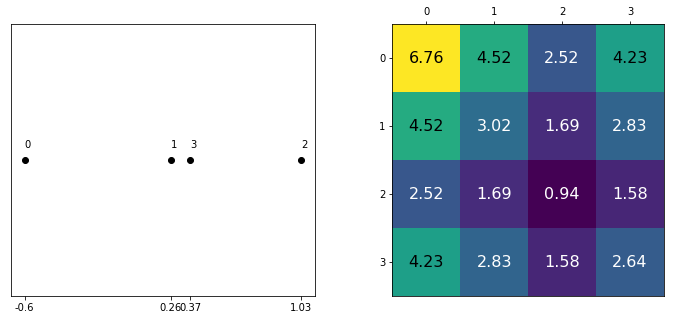

In [15]:
data = np.random.normal(size=4)
plot_covariance(data)

# Exercise 7
Run a logistic regression model for the space_flu data. What do you see? Can you explain the result?

In [16]:
df_sf = pd.read_csv('../code/data/space_flu.csv')
age = df_sf.age.values
space_flu = df_sf.space_flu.values

In [17]:
# Linear Model
with pm.Model() as space_flu_model:
    α = pm.Normal("α", 0,1)
    β = pm.Normal("β", 0,1)
    ϵ = pm.Exponential("ϵ", 1)
    
    μ = α + pm.math.dot(age, β)
    θ = pm.Deterministic("θ", pm.math.sigmoid(μ))
    
    bd = pm.Deterministic('bd', -α/β)
    
    y = pm.Bernoulli("y", p=θ, observed=space_flu)
    flu_logistic_trace = pm.sample(4000)
    flu_logistic_samples  = pm.sample_posterior_predictive(flu_logistic_trace, vars=[θ,y], samples=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
100%|██████████| 1000/1000 [00:00<00:00, 3894.51it/s]


Text(0, 0.5, 'θ')

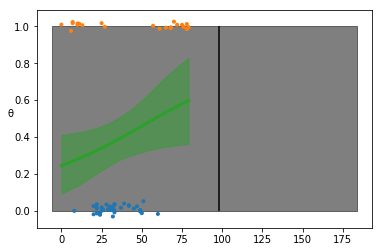

In [18]:
# Plot decision boundary
plt.vlines(flu_logistic_trace['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hpd(flu_logistic_trace['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)

# Plot observed value
plt.scatter(age, np.random.normal(space_flu, 0.02), marker='.', color=[f'C{x}' for x in space_flu])

# Plot mean of parameter estimate
theta = flu_logistic_trace['θ'].mean(axis=0)
idx = np.argsort(age)
plt.plot(age[idx], theta[idx], color='C2', lw=3)

# Plot confidence of parameter estimate
az.plot_hpd(age, flu_logistic_trace['θ'], color='C2')

plt.ylabel('θ', rotation=0)

## Exercise 9
Change the logistic regression model in order to fit the data. Tip, use an order two polynomial.

In [19]:
df_sf = pd.read_csv('../code/data/space_flu.csv')
age = df_sf.age.values
space_flu = df_sf.space_flu.values


In [20]:
# Quadratic Model
with pm.Model() as space_flu_model:
    α = pm.Normal("α", 0,1)
    β = pm.Normal("β", 0,1, shape=2)
    ϵ = pm.Exponential("ϵ", 1)
    
    # Quadratic Parmetarization is in this line
    μ = α + pm.math.dot(age, β[0]) + pm.math.dot(age**2, β[1])
    θ = pm.Deterministic("θ", pm.math.sigmoid(μ))
    
    # bd = pm.Deterministic('bd', -α/β)
    
    y = pm.Bernoulli("y", p=θ, observed=space_flu)
    flu_logistic_trace = pm.sample(4000)
    flu_logistic_samples  = pm.sample_posterior_predictive(flu_logistic_trace, vars=[θ,y], samples=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
Sampling 4 chains: 100%|██████████| 18000/18000 [00:12<00:00, 1474.98draws/s]
The acceptance probability does not match the target. It is 0.8979909354540494, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8789797304019081, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9055478985631059, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9182246730128105, but should be close to 0.8. Try to increase the number of tuning steps.
100%|██████████| 1000/1000 [00:00<00:00, 3940.01it/s]


Text(0, 0.5, 'θ')

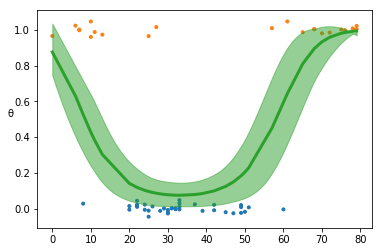

In [21]:
# Plot observed value
plt.scatter(age, np.random.normal(space_flu, 0.02), marker='.', color=[f'C{x}' for x in space_flu])

# Plot mean of parameter estimate
theta = flu_logistic_trace['θ'].mean(axis=0)
idx = np.argsort(age)
plt.plot(age[idx], theta[idx], color='C2', lw=3)

# Plot confidence of parameter estimate
az.plot_hpd(age, flu_logistic_trace['θ'], color='C2')

plt.ylabel('θ', rotation=0)

## Exercise 9
Compare the model for the coal mining disaster with the one from the PyMC3
documentation ( https://docs.pymc.io/notebooks/getting_started.html#Case-study-2:-Coal-mining-disasters). Describe the differences between both models in terms of model-specification and results.

## Question:
The model in the book and the model from PyMC3 docs answer different questions

PyMC3 docs answer question: When did rate of coal mining diaster change, specifically done by estimating three things, rate prior to change event, and rate post change event, and change event time
Book estimates what is rate of coal mining disasters at any point in time. It does not answer the question of when was an event that led to change in rate

Is my understanding correct